In [1]:
from fastai.column_data import *

/home/hamim/anaconda3/envs/fastai3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hamim/anaconda3/envs/fastai3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hamim/anaconda3/envs/fastai3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [1]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)


/home/hamim/anaconda3/envs/fastai3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hamim/anaconda3/envs/fastai3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hamim/anaconda3/envs/fastai3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
PATH ='data/rossmann'

In [67]:
joined = pd.read_feather('data/rossmann/joined3')
joined_test = pd.read_feather('data/rossmann/joined_test3')

/home/hamim/anaconda3/envs/fastai3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [68]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week',  ]

contin_vars = ['CompetitionDistance', 
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [69]:
joined.drop(['StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw','Promo_fw', 'Promo_bw',], inplace = True, axis = 1)

In [70]:
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [71]:
for v in cat_vars:
    joined[v] = joined[v].astype('category').cat.as_ordered()

In [72]:
joined.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Promo2SinceYear,State,Week,CompetitionDistance,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales,Date
0,1,5,2015,7,31,False,24,0,c,a,...,1900,HE,31,1270.0,0.0,0.0,1.0,1.0,5263,2015-07-31
1,2,5,2015,7,31,False,24,25,a,a,...,2010,TH,31,570.0,0.0,0.0,1.0,1.0,6064,2015-07-31
2,3,5,2015,7,31,False,24,25,a,a,...,2011,NW,31,14130.0,0.0,0.0,1.0,1.0,8314,2015-07-31
3,4,5,2015,7,31,False,24,0,c,c,...,1900,BE,31,620.0,0.0,0.0,1.0,1.0,13995,2015-07-31
4,5,5,2015,7,31,False,3,0,a,a,...,1900,SN,31,29910.0,0.0,0.0,1.0,1.0,4822,2015-07-31


In [73]:
joined.DayOfWeek.cat.codes.head()

0    4
1    4
2    4
3    4
4    4
dtype: int8

In [74]:
#apply_cats(joined_test, joined)

In [75]:
joined.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Promo2SinceYear,State,Week,CompetitionDistance,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales,Date
0,1,5,2015,7,31,False,24,0,c,a,...,1900,HE,31,1270.0,0.0,0.0,1.0,1.0,5263,2015-07-31
1,2,5,2015,7,31,False,24,25,a,a,...,2010,TH,31,570.0,0.0,0.0,1.0,1.0,6064,2015-07-31
2,3,5,2015,7,31,False,24,25,a,a,...,2011,NW,31,14130.0,0.0,0.0,1.0,1.0,8314,2015-07-31
3,4,5,2015,7,31,False,24,0,c,c,...,1900,BE,31,620.0,0.0,0.0,1.0,1.0,13995,2015-07-31
4,5,5,2015,7,31,False,3,0,a,a,...,1900,SN,31,29910.0,0.0,0.0,1.0,1.0,4822,2015-07-31


In [76]:
joined_test.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,SchoolHoliday_fw,SchoolHoliday_bw,CompetitionDistance,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales,Date,Id
0,1,4,2015,9,17,False,24,0,c,a,...,NaN,NaN,1270.0,0.0,0.0,1.0,0.0,0,2015-09-17,1
1,3,4,2015,9,17,False,24,25,a,a,...,NaN,NaN,14130.0,0.0,0.0,1.0,0.0,0,2015-09-17,2
2,7,4,2015,9,17,False,24,0,a,c,...,NaN,NaN,24000.0,0.0,0.0,1.0,0.0,0,2015-09-17,3
3,8,4,2015,9,17,False,11,0,a,a,...,NaN,NaN,7520.0,0.0,0.0,1.0,0.0,0,2015-09-17,4
4,9,4,2015,9,17,False,24,0,a,c,...,NaN,NaN,2030.0,0.0,0.0,1.0,0.0,0,2015-09-17,5


In [77]:
joined.columns

Index(['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday',
       'CompetitionMonthsOpen', 'Promo2Weeks', 'StoreType', 'Assortment',
       'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State',
       'Week', 'CompetitionDistance', 'AfterStateHoliday',
       'BeforeStateHoliday', 'Promo', 'SchoolHoliday', 'Sales', 'Date'],
      dtype='object')

In [78]:
joined.shape

(844338, 22)

In [79]:
joined_test.columns

Index(['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday',
       'CompetitionMonthsOpen', 'Promo2Weeks', 'StoreType', 'Assortment',
       'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State',
       'Week', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
       'SchoolHoliday_fw', 'SchoolHoliday_bw', 'CompetitionDistance',
       'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday',
       'Sales', 'Date', 'Id'],
      dtype='object')

In [80]:
n = len(joined)
idxs = get_cv_idxs(n, val_pct=150000/n)
joined_samp = joined.iloc[idxs].set_index("Date")
samp_size = len(joined_samp)
samp_size

150000

In [81]:


samp_size = n
joined_samp = joined.set_index("Date")



In [82]:
joined_samp.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,CompetitionDistance,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,2015,7,31,False,24,0,c,a,...,2008,1900,HE,31,1270.0,0.0,0.0,1.0,1.0,5263
2015-07-31,2,5,2015,7,31,False,24,25,a,a,...,2007,2010,TH,31,570.0,0.0,0.0,1.0,1.0,6064
2015-07-31,3,5,2015,7,31,False,24,25,a,a,...,2006,2011,NW,31,14130.0,0.0,0.0,1.0,1.0,8314
2015-07-31,4,5,2015,7,31,False,24,0,c,c,...,2009,1900,BE,31,620.0,0.0,0.0,1.0,1.0,13995
2015-07-31,5,5,2015,7,31,False,3,0,a,a,...,2015,1900,SN,31,29910.0,0.0,0.0,1.0,1.0,4822


In [83]:
joined_samp.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,CompetitionDistance,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,2015,7,31,False,24,0,c,a,...,2008,1900,HE,31,1270.0,0.0,0.0,1.0,1.0,5263
2015-07-31,2,5,2015,7,31,False,24,25,a,a,...,2007,2010,TH,31,570.0,0.0,0.0,1.0,1.0,6064
2015-07-31,3,5,2015,7,31,False,24,25,a,a,...,2006,2011,NW,31,14130.0,0.0,0.0,1.0,1.0,8314
2015-07-31,4,5,2015,7,31,False,24,0,c,c,...,2009,1900,BE,31,620.0,0.0,0.0,1.0,1.0,13995
2015-07-31,5,5,2015,7,31,False,3,0,a,a,...,2015,1900,SN,31,29910.0,0.0,0.0,1.0,1.0,4822


In [84]:
df, y, nas, mapper = proc_df(joined_samp, 'Sales', do_scale=True)
yl = np.log(y)
        


In [85]:
mapper

DataFrameMapper(default=False, df_out=False,
        features=[(['CompetitionDistance'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['AfterStateHoliday'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['BeforeStateHoliday'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Promo'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['SchoolHoliday'], StandardScaler(copy=True, with_mean=True, with_std=True))],
        input_df=False, sparse=False)

In [86]:
df.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,CompetitionDistance,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,3,7,31,1,25,1,3,1,0,16,1,5,31,-0.534831,0.0,0.0,1.113717,2.04105
2015-07-31,2,5,3,7,31,1,25,26,1,1,2,15,3,12,31,-0.624524,0.0,0.0,1.113717,2.04105
2015-07-31,3,5,3,7,31,1,25,26,1,1,2,14,4,7,31,1.112961,0.0,0.0,1.113717,2.04105
2015-07-31,4,5,3,7,31,1,25,1,3,3,0,17,1,1,31,-0.618118,0.0,0.0,1.113717,2.04105
2015-07-31,5,5,3,7,31,1,4,1,1,1,0,23,1,10,31,3.134902,0.0,0.0,1.113717,2.04105


In [87]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [88]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [98]:


md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                    )



In [99]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [100]:
cat_sz

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53)]

In [101]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [102]:
emb_szs

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27)]

In [103]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
m.summary()

OrderedDict([('Embedding-1',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 50]),
                           ('trainable', True),
                           ('nb_params', 55800)])),
             ('Embedding-2',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 4]),
                           ('trainable', True),
                           ('nb_params', 32)])),
             ('Embedding-3',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 8)])),
             ('Embedding-4',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 7]),
                           ('trainable', True),
                           ('nb_params', 91)])),
             ('Embedding-5',
              OrderedDict([('input_shape', [-1])

In [104]:
y

array([ 5263,  6064,  8314, 13995,  4822,  5651, 15344,  8492,  8565,  7185, 10457,  8959,  8821,  6544,
        9191, 10231,  8430, 10071,  8234,  9593, ...,  6218, 20642,  3697,  4220,  6851, 17267,  3102,  2401,
        3139,  9643,  3113,  2646,  2907,  8498,  3821,  3375, 10765,  5035,  4491,  5961])

In [105]:
lr = 1e-3
m.lr_find()

 64%|██████▎   | 3150/4948 [00:22<00:12, 141.41it/s, loss=0.0531]

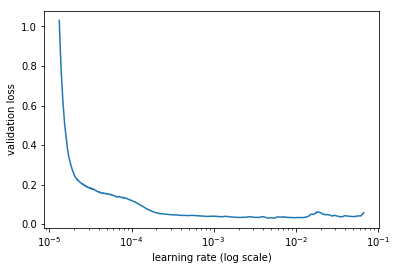

In [108]:
m.sched.plot(100)

In [109]:
m.fit(lr,3,metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.014027   0.028865   0.185143  
    1      0.011613   0.028878   0.195037                        
    2      0.010515   0.027674   0.186724                         


[array([0.02767]), 0.18672431487375382]